## Two-springs system

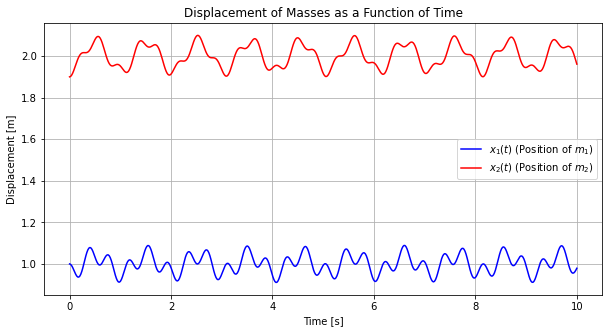

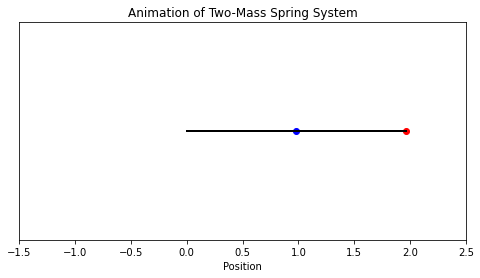

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp
from IPython.display import HTML

# Define constants
k1 = 100.0  # Spring constant for the soft spring
k2 = 100.0  # Large spring constant for the stiff spring
m1 = 1.0  # Mass of the first ball
m2 = 1.0  # Mass of the second ball

# Define offsets for absolute positions
x1_offset = 1  # Equilibrium position of m1
x2_offset = 2  # Equilibrium position of m2

# Define the system of ODEs
def spring_system(t, y):
    # linearized 
    x1, v1, x2, v2 = y
    dx1dt = v1
    dv1dt = (-k1 * x1 + k2 * (x2 - x1)) / m1
    dx2dt = v2
    dv2dt = (-k2 * (x2 - x1)) / m2
    return [dx1dt, dv1dt, dx2dt, dv2dt]

# Initial conditions: x1(0) = 1, x2(0) = x1(0), v1(0) = v2(0) = 0
initial_conditions = [0., 0.0, -0.1, 0.0]

# Time span for simulation
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Solve the system numerically
solution = solve_ivp(spring_system, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extract results
t = solution.t
x1 = solution.y[0] + x1_offset  # Add offset to get absolute position
x2 = solution.y[2] + x2_offset  # Add offset to get absolute position


# --- Static Plot: Displacement vs Time ---
plt.figure(figsize=(10, 5))
plt.plot(t, x1, label="$x_1(t)$ (Position of $m_1$)", color="blue")
plt.plot(t, x2, label="$x_2(t)$ (Position of $m_2$)", color="red")
plt.title("Displacement of Masses as a Function of Time")
plt.xlabel("Time [s]")
plt.ylabel("Displacement [m]")
plt.legend()
plt.grid(True)
plt.show()

# --- Animation ---
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xlim(-1.5, 2.5)
ax.set_ylim(-0.5, 0.5)
ax.set_title('Animation of Two-Mass Spring System')
ax.set_xlabel('Position')
ax.get_yaxis().set_visible(False)

# Create the masses and springs as graphical elements
mass1, = ax.plot([], [], 'o', color='blue', label='$m_1$')
mass2, = ax.plot([], [], 'o', color='red', label='$m_2$')
spring1, = ax.plot([], [], '-', color='black', lw=2)
spring2, = ax.plot([], [], '-', color='black', lw=2)

# Initialize animation
def init():
    mass1.set_data([], [])
    mass2.set_data([], [])
    spring1.set_data([], [])
    spring2.set_data([], [])
    return mass1, mass2, spring1, spring2

# Update animation frame
def update(frame):
    mass1.set_data([x1[frame]], [0])
    mass2.set_data([x2[frame]], [0])
    spring1.set_data([0, x1[frame]], [0, 0])
    spring2.set_data([x1[frame], x2[frame]], [0, 0])
    return mass1, mass2, spring1, spring2

# Create animation
ani = FuncAnimation(fig, update, frames=len(t), init_func=init, blit=True, interval=20)

# Embed animation in Jupyter Notebook
HTML(ani.to_jshtml())
